<a href="https://colab.research.google.com/github/JUCSERahull337/DiabeticRetinopathy/blob/master/BinaryClassification_of_DR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import cv2
import os
from zipfile import ZipFile
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
from skimage.transform import resize
from imgaug import augmenters as iaa
from tqdm import tqdm
import PIL
from PIL import Image, ImageOps
import cv2
from sklearn.utils import class_weight, shuffle
from keras.losses import binary_crossentropy
from keras.applications.resnet import preprocess_input
import keras.backend as K
import tensorflow as tf
from sklearn.metrics import f1_score, fbeta_score

from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
dataset = []
labels = []

In [ ]:
def prepare_Images(label,path):
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    try:
      img_res=cv2.resize(img,(256,256))
      img_array = img_to_array(img_res)
      img_array = img_array/255.0
      dataset.append(img_array)
      if str(label) == '0':
        labels.append('0')
      else:
        labels.append('1')
    except:
      print("error")

In [ ]:
train_Data = pd.read_csv("/content/drive/MyDrive/DDR Dataset/merged.csv")
train_Data.head()

,id_code,diagnosis
0,20170413102628830.jpg,0
1,20170413112017305.jpg,0
2,20170413112528859.jpg,0
3,20170413112758639.jpg,0
4,20170413112758698.jpg,0


In [ ]:
id_code_Data = train_Data['id_code']
diagnosis_Data = train_Data['diagnosis']

In [ ]:
for id_code,diagnosis in tqdm(zip(id_code_Data,diagnosis_Data)):
    path = os.path.join('/content/drive/MyDrive/DDR Dataset/train/','{}'.format(id_code))
    prepare_Images(diagnosis,path)

In [ ]:
images = np.array(dataset)
label_arr = np.array(labels)
print(len(images))
print(len(label_arr))

157
157


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(images,label_arr,stratify=label_arr,test_size=0.15,random_state=44)
print("Number of training samples:", x_train.shape[0])
print("Number of training labels:", y_train.shape[0])
print("Number of testing samples:", x_test.shape[0])
print("Number of testing labels:", y_test.shape[0])



Number of training samples: 133
Number of training labels: 133
Number of testing samples: 24
Number of testing labels: 24


In [ ]:
y_train= np_utils.to_categorical(y_train, num_classes=2)
y_test = np_utils.to_categorical(y_test, num_classes=2)

In [ ]:
input_shape = (128,256, 256, 3)
n_classes = 2

resnet_model = tf.keras.applications.ResNet50(
    input_shape=(256,256,3),
    include_top=False,
    weights='imagenet'
)

resnet_model.trainable =False

resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
resnettrain = tf.keras.Sequential([
    resnet_model,
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

resnettrain.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 2048)       8192      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 16)                2097168   
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                        

Previous Code

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

resnettrain.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"],
    run_eagerly=True
)

In [ ]:
resnettrain.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
resnettrain.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [ ]:
history = resnettrain.fit(
    x_train,
    y_train,
    batch_size=64,
    verbose=1,
    epochs=50

)

Epoch 1/50
3/3 [==============================] - 40s 10s/step - loss: 1.0454 - accuracy: 0.5940
Epoch 2/50
3/3 [==============================] - 32s 8s/step - loss: 1.0653 - accuracy: 0.5714
Epoch 3/50
3/3 [==============================] - 32s 8s/step - loss: 1.0321 - accuracy: 0.5564
Epoch 4/50
3/3 [==============================] - 36s 10s/step - loss: 1.0400 - accuracy: 0.6165
Epoch 5/50
3/3 [==============================] - 32s 8s/step - loss: 1.0146 - accuracy: 0.5940
Epoch 6/50
3/3 [==============================] - 32s 8s/step - loss: 1.0021 - accuracy: 0.5789
Epoch 7/50
3/3 [==============================] - 39s 12s/step - loss: 0.9648 - accuracy: 0.5263
Epoch 8/50
3/3 [==============================] - 32s 8s/step - loss: 0.9461 - accuracy: 0.6466
Epoch 9/50
3/3 [==============================] - 32s 8s/step - loss: 0.9148 - accuracy: 0.6015
Epoch 10/50
3/3 [==============================] - 35s 9s/step - loss: 0.9029 - accuracy: 0.6466
Epoch 11/50
3/3 [===================

In [ ]:
pred = resnettrain.predict(x_test)

resnettrain.evaluate(x_test,y_test)

1/1 [==============================] - 10s 10s/step - loss: 0.2714 - accuracy: 1.0000


[0.27141693234443665, 1.0]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
conMat = confusion_matrix(y_test.argmax(axis=1),pred.argmax(axis=1))
print(conMat)

[[24]]


In [ ]:
score = round(accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)),2)
print(score)

1.0


<Axes: >

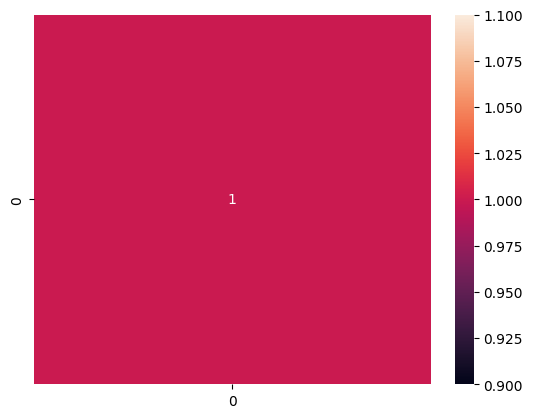

In [ ]:
from sklearn.preprocessing import normalize
import seaborn as sns
normed_confusion_matrix = normalize(conMat , axis = 1, norm = 'l1')
cm_df = pd.DataFrame(normed_confusion_matrix)
sns.heatmap (cm_df , annot =True)

In [ ]:
report = classification_report(y_test.argmax(axis=1), pred.argmax(axis=1))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



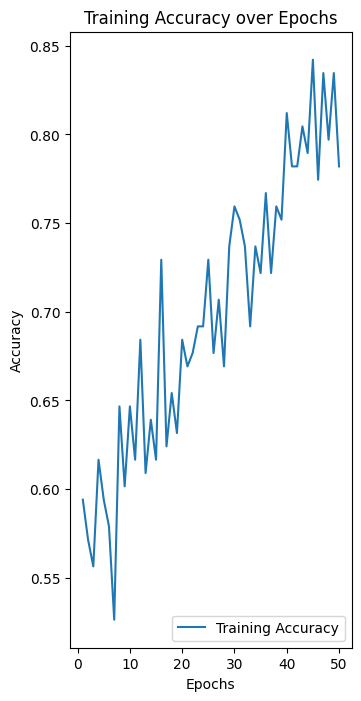

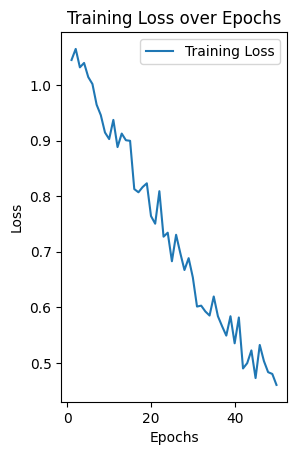

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(1, len(acc) + 1)  # Use the number of epochs as the x-axis values

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.legend(loc="lower right")
plt.title("Training Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.legend(loc="upper right")
plt.title("Training Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
pred = resnettrain.predict(x_test)

# Convert predictions and true labels to class labels
pred_labels = pred.argmax(axis=1)
true_labels = y_test.argmax(axis=1)
precision = precision_score(true_labels, pred_labels, average='micro')

# Calculate recall
recall = recall_score(true_labels, pred_labels, average='micro')

# Calculate F1 score
f1 = f1_score(true_labels, pred_labels, average='micro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


1/1 [==============================] - 7s 7s/step
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [ ]:
pred = resnettrain.predict(x_test)
pred = np.argmax(pred,axis=1)

1/1 [==============================] - 5s 5s/step


[1. 0.]
Prediction: DR


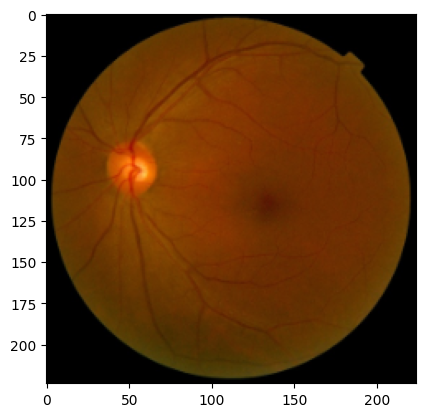

In [ ]:
index =2
predictions=["DR","No DR"]

img = x_test[index]
RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
RGBImg= cv2.resize(RGBImg,(224,224))

plt.imshow(RGBImg)
print(y_test[index]) # true
print(f"Prediction: {predictions[pred[index]]}")